# Week 10 of Introduction to Biological System Design
## Compiling Chemical Reaction Network Models for Biological Systems
### Ayush Pandey

Pre-requisite: To get the best out of this notebook, make sure that you have basic understanding of chemical reaction networks and ordinary differential equations (ODE). Further, we also use Hill functions to build models of biological systems. Refer to the [E164 class material](pages.hmc.edu/pandey/) for background on any topics in this notebook.

This notebook discusses a Python package called [BioCRNpyler](https://github.com/BuildACell/BioCRNPyler) (pronounced Bio-Compiler) that can be used to compile chemical reaction network models for biological systems.

Disclaimer: The content in this notebook is taken from the BioCRNpyler Github examples. 
Copyright: Build-A-Cell.
Package Authors: William Poole, Ayush Pandey, Andrey Shur, Zoltan Tuza, and Richard M. Murray


## Building Chemical Reaction Networks (CRNs) Directly with BioCRNpyler

### What is a CRN?
A CRN is a widely established model of chemistry and biochemistry.
* A set of species $S$
* A set of reactions $R$ interconvert species $I_r$ to $O_r$

\begin{align}
\\
I \xrightarrow[]{\rho(s)} O
\\
\end{align}

 * $I$ and $O$ are multisets of species $S$. 
 * $\rho(s): S \to \mathbb{R}$ is a function that determines how fast the reaction occurs.


In [ ]:
# Running this notebook for the first time? 
# Make sure you have biocrnpyler installed in your environment.
# To install biocrnpyler uncomment the following and run:
# !pip install biocrnpyler

In [1]:
#Import everything from biocrnpyler
from biocrnpyler import *

C:\Users\apand\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


## Combining Species and Reactions into a CRN

The following code defines a species called 'S' made out of material 'material'. Species can also have attributes to help identify them. Note that Species with the same name, but different materials or attributes are considered different species in terms of the reactions they participate in.

    S = Species('name', material_type = 'material', attributes = [])

The collowing code produces a reaction R
    
    R = Reaction(Inputs, Outputs, k)

here Inputs and Outputs must both be a list of Species. the parameter k is the rate constant of the reaction. By default, propensities in BioCRNpyler are massaction:

### $\rho(S) = k \Pi_{s} s^{I_s}$

Note: for stochastic models mass action propensities are $\rho(S) = k \Pi_{s} s!/(s - I_s)!$.

Massaction reactions can be made reversible with the k_rev keyword:

    R_reversible = Reaction(Inputs, Outputs, k, k_rev = krev)

is the same as two reactions:

    R = Reaction(Inputs, Outputs, k)
    Rrev = Reaction(Outputs, Inputs, krev)


Finally, a CRN can be made by combining species and reactions:

    CRN = ChemicalReactionNetwork(species = species, reactions = reactions, initial_condition_dict = {})

Here, initial_condition_dict is an optional dictionary to store the initial values of different species. 

    initial_condition_dict = {Species:value}

Species without an initial condition will default to 0.

### An example:

In [31]:
#Example: Model the CRN consisting of: A --> 2B, 
# 2B <--> B + C where C has the same name as B but a new material
A = Species("A", material_type = "m1", 
            attributes = ["attribute"])
B = Species("B", material_type = "m1")
C = Species("B", material_type = "m2")
D = Species("D")

print("Species can be printed to show"\
      "their string representation:", A, B, C, D)

#Reaction Rates
k1 = 3.
k2 = 1.4
k2rev = 0.15

#Reaciton Objects
R1 = Reaction.from_massaction([A], [B, B], k_forward = k1, k_reverse = 0.9)
R2 = Reaction.from_massaction([B], [C, D], k_forward = k2)

print("\nReactions can be printed as well:\n", R1,"\n", R2)

#create an initial condition so A has a non-zero value
initial_concentration_dict = {A:10}

#Make a CRN
CRN = ChemicalReactionNetwork(species = [A, B, C, D], 
                              reactions = [R1, R2], 
                              initial_concentration_dict = 
                              initial_concentration_dict)

#CRNs can be printed in two different ways
print("\nDirectly printing a CRN shows the string"\
        "representation of the species used in BioCRNpyler:")
print(CRN)

print("\nCRN.pretty_print(...) is a function that prints"\
      "a more customizable version of the CRN, but doesn't"\
      "show the proper string representation of species.")
print(CRN.pretty_print(show_materials = True, 
                       show_rates = True, show_attributes = True))

Species can be printed to showtheir string representation: m1_A_attribute m1_B m2_B D

Reactions can be printed as well:
 m1[A(attribute)] <--> 2m1[B] 
 m1[B] --> m2[B]+D

Directly printing a CRN shows the stringrepresentation of the species used in BioCRNpyler:
Species = m1_A_attribute, m1_B, m2_B, D
Reactions = [
	m1[A(attribute)] <--> 2m1[B]
	m1[B] --> m2[B]+D
]

CRN.pretty_print(...) is a function that printsa more customizable version of the CRN, but doesn'tshow the proper string representation of species.
Species(N = 4) = {
m1[A(attribute)] (@ 10),  D (@ 0),  m2[B] (@ 0),  m1[B] (@ 0),  
}

Reactions (2) = [
0. m1[A(attribute)] <--> 2m1[B]
 Kf=k_forward * m1_A_attribute
 Kr=k_reverse * m1_B^2
  k_forward=3.0
  k_reverse=0.9

1. m1[B] --> m2[B]+D
 Kf=k_forward * m1_B
  k_forward=1.4

]


### CRNs can be saved as SBML and simulated

To save a CRN as SBML:

    CRN.write_sbml_file("file_name.xml")

To simulate a CRN with biosrape:

    Results, Model = CRN_expression.simulate_with_bioscrape(timepoints, initial_condition_dict = x0)

Where x0 is a dictionary: x0 = {species_name:initial_value}

In [32]:
# To simulate the CRN, install Bioscrape, a Python-based simulator
# Uncomment the following line to install Bioscrape
# !pip install bioscrape

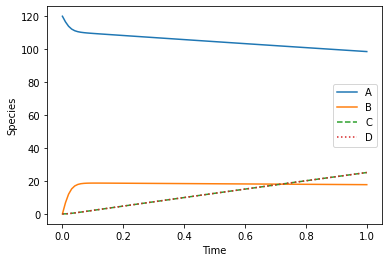

In [33]:
#Saving and simulating a CRN
CRN.write_sbml_file("build_crns_directly.xml")


try:
    import bioscrape
    import numpy as np
    import pylab as plt
    import pandas as pd
    
    #Initial conditions can be set with a dictionary:
    x0 = {A:120}
    #Timepoints to simulate over
    timepoints = np.linspace(0, 1, 100)
    
    #This function can also take a filename keyword to 
    # save the file at the same time
    R = CRN.simulate_with_bioscrape_via_sbml(timepoints = timepoints, 
                                             initial_condition_dict = x0)

    #Check to ensure simulation worked
    #Results are in a Pandas Dictionary and can be accessed 
    # via string-names of species
    plt.plot(R['time'], R[str(A)], label = "A")
    plt.plot(R['time'], R[str(B)], label = "B")
    plt.plot(R['time'], R[str(C)], "--", label = "C")
    plt.plot(R['time'], R[str(D)],":", label = "D")
    plt.xlabel('Time')
    plt.ylabel('Species')
    plt.legend()
    
except ModuleNotFoundError:
    print("Plotting Modules not installed.")

## Hill Functions with BioCRNpyler

### HillPositive: 
$\rho(s) = k \frac{s_1^n}{K^n+s_1^n}$

Requried parameters: rate constant "k", offset "K", hill coefficient "n", hill species "s1".

In [20]:
#create the propensity
R = Species("R")
hill_pos  = HillPositive(k=1, s1=R, K=5, n=2)

#create the reaction
r_hill_pos = Reaction([A], [B], propensity_type = hill_pos)

#print the reaction
print(r_hill_pos.pretty_print())

m1[A(attribute)] --> m1[B]
 Kf = k R^n / ( K^n + R^n )
  k=1
  K=5
  n=2



### HillNegative: 
$\rho(s) = k \frac{1}{K^n+s_1^n}$

Requried parameters: rate constant "k", offset "K", hill coefficient "n", hill species "s1".

In [21]:
#create the propensity
R = Species("R")
hill_neg  = HillPositive(k=1, s1=R, K=5, n=2)

#create the reaction
r_hill_neg = Reaction([A], [B], propensity_type = hill_neg)

#print the reaction
print(r_hill_neg.pretty_print())

m1[A(attribute)] --> m1[B]
 Kf = k R^n / ( K^n + R^n )
  k=1
  K=5
  n=2



### ProportionalHillPositive: 
$\rho(s, d) = k d \frac{s_1^n}{K^n + s_1^n}$

Requried parameters: rate constant "k", offset "K", hill coefficient "n", hill species "s1", proportional species "d"

In [22]:
#create the propensity
R = Species("R")
D = Species("D")
prop_hill_pos  = ProportionalHillPositive(k=1, s1=R, K=5, n=2, d = D)

#create the reaction
r_prop_hill_pos = Reaction([A], [B], propensity_type = prop_hill_pos)

#print the reaction
print(r_prop_hill_pos.pretty_print())

m1[A(attribute)] --> m1[B]
 Kf = k D R^n / ( K^n + R^n )
  k=1
  K=5
  n=2



### ProportionalHillNegative: 
$\rho(s, d) = k d \frac{1}{K^n + s_1^n}$

Requried parameters: rate constant "k", offset "K", hill coefficient "n", hill species "s1", proportional species "d"

In [24]:
#create the propensity
R = Species("R")
D = Species("D")
prop_hill_neg  = ProportionalHillNegative(k=1, s1=R, K=5, n=2, d = D)

#create the reaction
r_prop_hill_neg = Reaction([A], [B], propensity_type = prop_hill_neg)

#print the reaction
print(r_prop_hill_neg.pretty_print())

m1[A(attribute)] --> m1[B]
 Kf = k D / ( 1 + (R/K)^2 )
  k=1
  K=5
  n=2



### General Propensity: 
$\rho(s) = $ function of your choice

For general propensities, the function must be written out as a string with all species and parameters declared.

In [26]:
#create species
# create some parameters - note that parameters will be discussed in the next lecture
k1 = ParameterEntry("k1", 1.11)
k2 = ParameterEntry("k2", 2.22)
S = Species("S")

#type the string as a rate then declare teh species and parameters
general = GeneralPropensity(f'k1*2 - k2/{S}^2', propensity_species=[S], propensity_parameters=[k1, k2])

r_general = Reaction([A, B], [], propensity_type = general)

print(r_general.pretty_print())

m1[A(attribute)]+m1[B] --> 
k1*2 - k2/S^2
  k1=1.11
  k2=2.22



## Next week:

### 1. Compiling CRNs with Enzymes Catalysis and Binding
### 2. DNA Assemblies gene expression transcription and translation
### 3. Promoters Transcriptional Regulation and Gene Regulatory Networks
### 4. Simulating and Analyzing SBML models 